In [122]:
#adding neccessary packages


import pandas as pd
import string

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline



from numpy import array
from pickle import dump

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences

from keras.layers import LSTM
from keras.layers import Embedding


from keras.models import load_model


from random import randint
from pickle import load


In [123]:
# creating a fucntion to import data from a text file--
# opening the file as read only and then reading the text


def load_file(filename):
    
    file = open(filename, 'r')                       
 
    text = file.read()

    file.close()
    
    return text
 

In [124]:
# turn contents into clean tokens by removing unwanted punctuations and non-alphabet characters
# all text is then returned as a small case text with only alphabets.

def clean_file(text_file):

    text_file = text_file.replace('--', ' ')
    
    tokens = text_file.split()
   
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    tokens = [word for word in tokens if word.isalpha()]
   
    tokens = [word.lower() for word in tokens]
    
    return tokens


In [125]:
# save tokens to file, one dialog per line


def save_file(lines, filename):
    
    data = '\n'.join(lines)
    file = open(filename, 'w')
    
    file.write(data)
    file.close()


In [126]:
# using the function to load training document
text_file = load_file('JekyllHyde.txt')
print(text_file[250:839])

NDOW

 THE LAST NIGHT

 DR. LANYON’S NARRATIVE

 HENRY JEKYLL’S FULL STATEMENT OF THE CASE
 

STORY OF THE DOOR

Mr. Utterson the lawyer was a man of a rugged countenance that was
never lighted by a smile; cold, scanty and embarrassed in discourse;
backward in sentiment; lean, long, dusty, dreary and yet somehow
lovable. At friendly meetings, and when the wine was to his taste,
something eminently human beaconed from his eye; something indeed which
never found its way into his talk, but which spoke not only in these
silent symbols of the after-dinner face, but more often and loudly 


In [127]:
# clean file tokens nad print unique ones

tokens = clean_file(text_file)
print(tokens[:100])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['the', 'strange', 'case', 'of', 'dr', 'jekyll', 'and', 'mr', 'hyde', 'by', 'robert', 'louis', 'stevenson', 'contents', 'story', 'of', 'the', 'door', 'search', 'for', 'mr', 'hyde', 'dr', 'jekyll', 'was', 'quite', 'at', 'ease', 'the', 'carew', 'murder', 'case', 'incident', 'of', 'the', 'letter', 'incident', 'of', 'dr', 'lanyon', 'incident', 'at', 'the', 'window', 'the', 'last', 'night', 'dr', 'narrative', 'henry', 'full', 'statement', 'of', 'the', 'case', 'story', 'of', 'the', 'door', 'mr', 'utterson', 'the', 'lawyer', 'was', 'a', 'man', 'of', 'a', 'rugged', 'countenance', 'that', 'was', 'never', 'lighted', 'by', 'a', 'smile', 'cold', 'scanty', 'and', 'embarrassed', 'in', 'discourse', 'backward', 'in', 'sentiment', 'lean', 'long', 'dusty', 'dreary', 'and', 'yet', 'somehow', 'lovable', 'at', 'friendly', 'meetings', 'and', 'when', 'the']
Total Tokens: 24550
Unique Tokens: 3871


In [128]:
# organize into sequences of tokens by selecting the  sequence of tokens. Converting and storing them as lines

length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    
    seq = tokens[i-length:i]
    
    line = ' '.join(seq)
   
    sequences.append(line)
    
print('Total Sequences: %d' % len(sequences))

Total Sequences: 24499


In [129]:
# save sequences to file

out_filename = 'JekyllHyde_sequences.txt'
save_file(sequences, out_filename)

In [130]:
text_file = load_file('JekyllHyde_sequences.txt')
lines = text_file.split('\n')

In [131]:
# integer encode sequences of words using tokenizer, then creating a vocabulary size

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

vocab_size = len(tokenizer.word_index) + 1

In [132]:
# # separate into input and output

sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

In [133]:
#Creating a RNN model using Long-short term memory
#Adding layes to the model using Rectified Linear Unit and Softmax, as there are multiclases

model = Sequential()
model.add(Embedding(vocab_size, 50, input_length = seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())


# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fitting the model using batches and for 100epochs
model.fit(X, y, batch_size=128, epochs=100)
 
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 50)            193600    
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 3872)              391072    
Total params: 735,572
Trainable params: 735,572
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
24499/24499 [==============================] - 41s 2ms/step - loss: 6.6255 - acc: 0.0625
Epoch 2/100
24499/24499 [=====

24499/24499 [==============================] - 36s 1ms/step - loss: 3.2145 - acc: 0.2816
Epoch 72/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.4727 - acc: 0.2603
Epoch 73/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.2988 - acc: 0.2792
Epoch 74/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.3167 - acc: 0.2788
Epoch 75/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.2698 - acc: 0.2837
Epoch 76/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.2289 - acc: 0.2878
Epoch 77/100
24499/24499 [==============================] - 51s 2ms/step - loss: 3.2834 - acc: 0.2830
Epoch 78/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.2979 - acc: 0.2810
Epoch 79/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.2532 - acc: 0.2832
Epoch 80/100
24499/24499 [==============================] - 36s 1ms/step - loss: 3.1629 - acc: 

In [134]:
# save the model to file
model.save('JekyllHyde_model.h5')
# save the tokenizer
dump(tokenizer, open('JekyllHyde_tokenizer.pkl', 'wb'))

In [135]:
# using load_model from keras we load the saved model


seq_length = len(lines[0].split()) - 1

#load the model
model = load_model('JekyllHyde_model.h5')

tokenizer = load(open('JekyllHyde_tokenizer.pkl', 'rb'))

In [136]:
# We then create a language model using the sequences and generate new text by selecting random sequences  

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    
    # generate a fixed number of words
    for _ in range(n_words):
        
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
                
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [137]:
# load cleaned text sequences

text_file = load_file('JekyllHyde_sequences.txt')
lines = text_file.split('\n')
seq_length = len(lines[0].split()) - 1
 
# load the model
model = load_model('JekyllHyde_model.h5')
 
# load the tokenizer
tokenizer = load(open('JekyllHyde_tokenizer.pkl', 'rb'))
 
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')
 
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated[:])

it almost rivalled the brightness of hope i was stepping leisurely across the court after breakfast drinking the chill of the air with pleasure when i was seized again with those indescribable sensations that heralded the change and i had but the time to gain the shelter of my cabinet before

two ahead now anatomical was long overthrown the screaming and obligation at least fumes of smiling and to be forced and you are not see it was a fine clear to the lawyer have been learning his clasped room i had come up with a tempest and the whole business


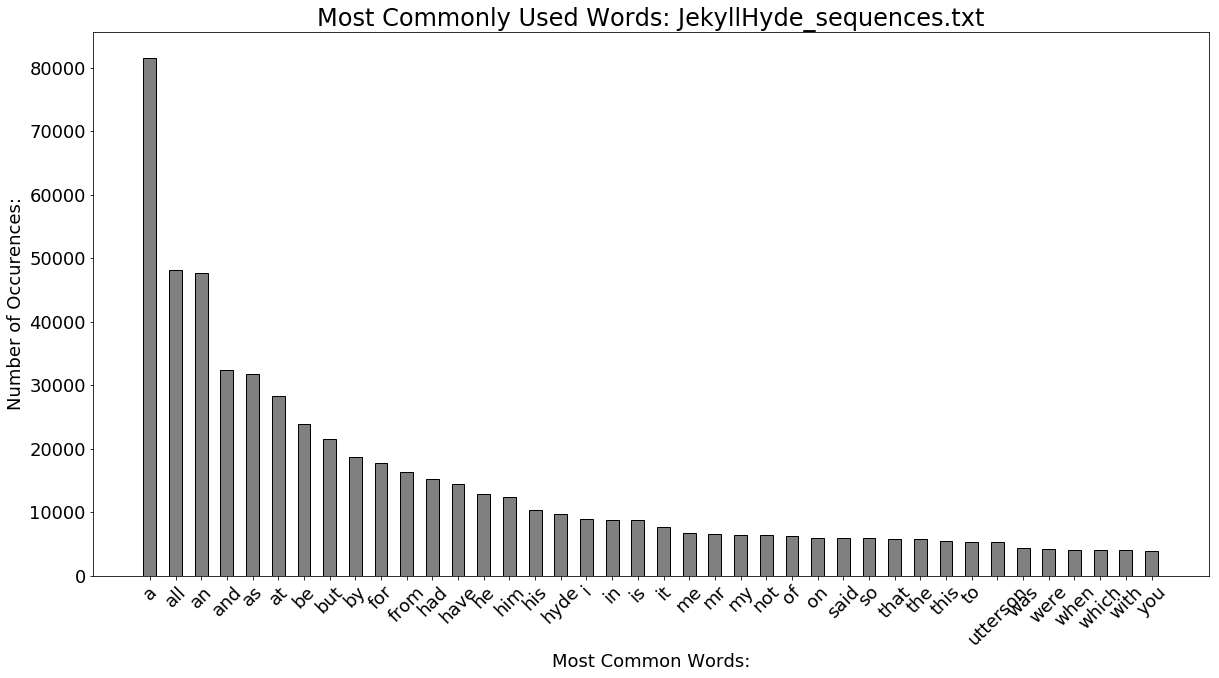

In [138]:

def plotWordFrequency(file):
    f = open(file,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (file), fontsize=24)
    plt.show()
    
    
    
file = 'JekyllHyde_sequences.txt'
plotWordFrequency(file)